<h1 style="font-size:50px;">IPL PREDICTION DATASET</h1>

<h3 style="font-size:30px;">GOAL OF PROJECT:</h3>

To build a machine learning model that predicts the winning team of an IPL match using factors like teams, toss result, toss decision, and venue. The project provides a data-driven system to help analysts and fans understand key factors influencing match outcomes.

<h3 style="font-size:30px;">DETAILED OBJECTIVES:</h3>

1.Understand the structure of the ipl dataset

2.Clean and preprocess the dataset

3.Exploratory Data Analysis (EDA

4.Feature Engineering

5.Model Building & Training

6.Model Evaluation & Validation

7.Prediction System Development


<H2  >1.UNDERSTAND THE STRUCTURE OF THE IPL DATASET</H2>

IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

READING THE FILE 

In [3]:
ipl=pd.read_csv('ipl_matches.csv')

--------------------------------------------------------------------------------------------------------------------------------------------------------
INITIAL  DATA OVERVIEW

In [4]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
ipl.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


-------Basic Information of dataset - Totally 755 Rows and 18 Columns

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


<h2> 2.CLEAN AND PRE-PROCESS THE DATASET</h2>

In [8]:
# Drop multiple columns
df = ipl.drop(['umpire1','umpire2','umpire3','result','dl_applied'], axis=1)

In [9]:
df.shape

(756, 13)

In [10]:
df.size

9828

--------------------------------------------------------------------------------------------------------------------------------------------------------

FINDING MISSING VALUES

In [11]:
df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [12]:
df.isnull().sum().sum()

15

--------------------------------------------------------------------------------------------------------------------------------------------------------
UNIQUE VALUE IDENTIFICATION

In [13]:
df.nunique()

id                 756
Season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------

UPDATING THE MISSING VALUES 

In [16]:
venue_city_map = {
    "Wankhede Stadium": "Mumbai",
    "Eden Gardens": "Kolkata",
    "M Chinnaswamy Stadium": "Bengaluru",
    "Narendra Modi Stadium": "Ahmedabad",
    "Arun Jaitley Stadium": "Delhi",
    "Sardar Patel Stadium, Motera": "Ahmedabad",
    # add more as needed...
}


In [17]:
# add the missing mapping entry
venue_city_map["Dubai International Cricket Stadium"] = "Dubai"

# fill city using the mapping
df['city'] = df['city'].fillna(df['venue'].map(venue_city_map))

# verify
print("Remaining null cities:", df['city'].isna().sum())

Remaining null cities: 0


In [18]:
# Fill missing Winner values with Team1
df['winner'] = df['winner'].fillna(df['team1'])

In [19]:
# Fill Player_of_match with previous (or next) known player of the same team
df['player_of_match'] = (
    df.groupby('winner')['player_of_match']
      .transform(lambda x: x.ffill().bfill())
)


In [20]:
df[['winner','team1','team2']] = df[['winner','team1','team2']].replace({
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Rising Pune Supergiants': 'Rising Pune Supergiants'
})


--------------------------------------------------------------------------------------------------------------------------------------------------------
RECHECKING FOR MISSING VALUES AFTER UPDATING THE MISSING VALUES

In [21]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------
CAPITALIZING THE COLUMN NAMES

In [22]:
df.columns=df.columns.str.capitalize()

------------------------------------------------------------------------------------------------------------------------------------------------------
SAVING THE DATASET AS CSV FILE

In [23]:
# Save cleaned DataFrame to CSV
df.to_csv("iplnew_data.csv", index=False)

print("✅ Cleaned data saved as cleaned_data.csv")


✅ Cleaned data saved as cleaned_data.csv


In [24]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())


['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue']


--------------------------------------------------------------------------------------------------------------------------------------------------------

FIND DUPLICATE VALUES

In [25]:
df.duplicated().sum()

0

--------------------------------------------------------------------------------------------------------------------------------------------------------

A FINAL OVERVIEW OF THE DATASET
-

In [26]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


-----------------------------------------------------------------------------------------------------------------------------------------------------------
FINDING OUTLIERS
-

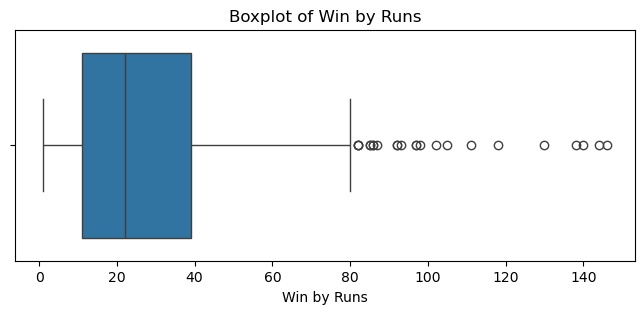

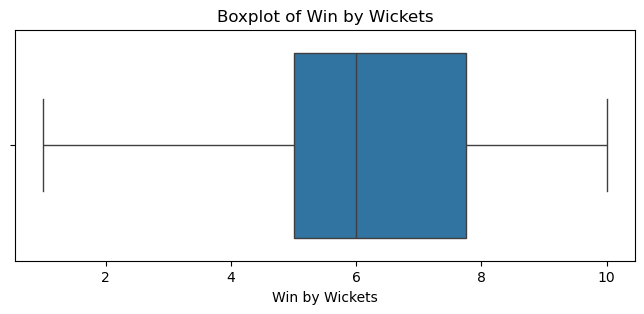

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zero values
ipl_runs = df[df['win_by_runs'] > 0]
ipl_wickets = df[df['win_by_wickets'] > 0]

plt.figure(figsize=(8,3))
sns.boxplot(x=ipl_runs['win_by_runs'])
plt.title("Boxplot of Win by Runs")
plt.xlabel("Win by Runs")
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=ipl_wickets['win_by_wickets'])
plt.title("Boxplot of Win by Wickets")
plt.xlabel("Win by Wickets")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

3.PERFORM UNIVARIATE , BIVARIATE AND MULTIVARIATE ANALYSIS
-

-------------------------------------------------------------------------------------------------------------------------------------------------------
UNIVARIATE ANALYIS 
-

Text(0.5, 1.0, 'Matches won by the Teams')

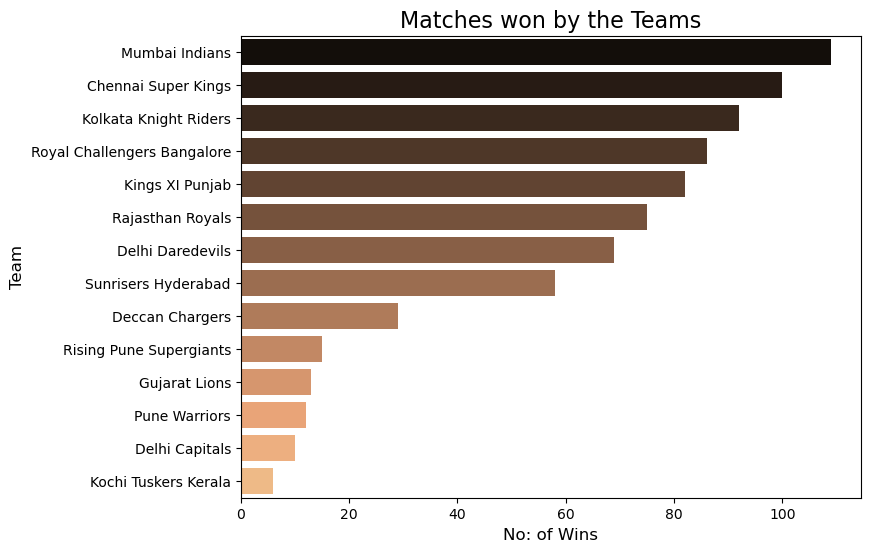

In [28]:
# Matches won by the Teams
plt.figure(figsize = (8,6))
sns.countplot(y = 'winner',
              data = df,
              order= df['winner'].value_counts().index,legend=False,palette = 'copper' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

INSIGHTS

--> Mumbai Indians are the most successful team with the highest number of wins.

--> Chennai Super Kings closely follow, showing strong and consistent performance.

--> Kolkata Knight Riders and Royal Challengers Bangalore also have a significant number of wins.

--> Newer/short-lived teams like Rising Pune Supergiant, Pune Warriors, and Gujarat Lions have fewer wins due to limited participation in IPL seasons.

--> Established franchises like Delhi Daredevils (Capitals) and Rajasthan Royals are in the mid-tier range.

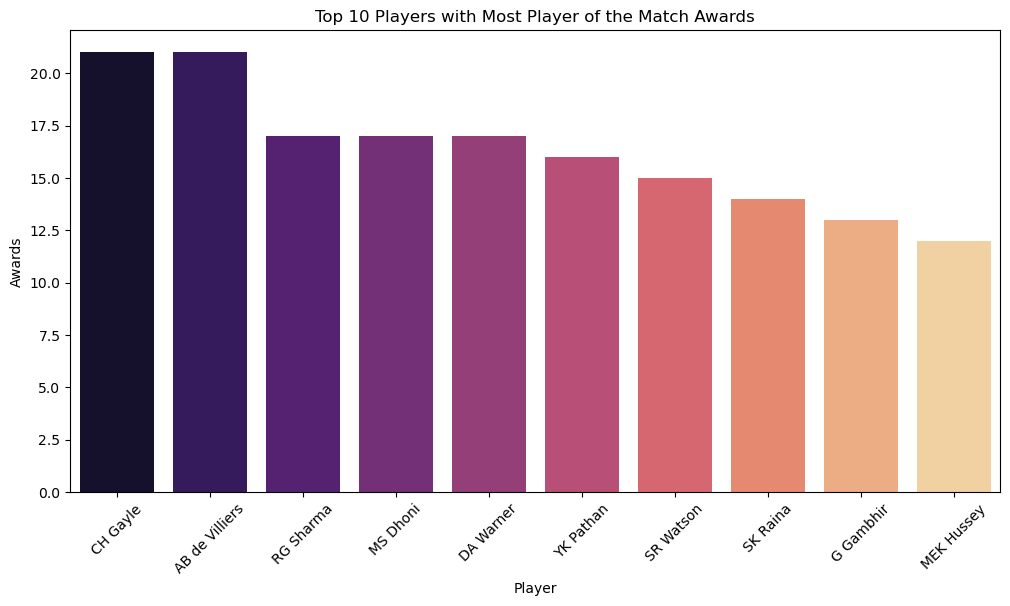

In [29]:
top_players = df['player_of_match'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_players.index,
    y=top_players.values,
    hue=top_players.index,   # set hue to the same variable
    palette="magma",
    legend=False             # hide duplicate legend
)
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Player")
plt.ylabel("Awards")
plt.xticks(rotation=45)
plt.show()

INSIGHTS

--> Chris Gayle and AB de Villiers have the most Player of the Match awards (21 each).

--> Rohit Sharma, MS Dhoni, and David Warner follow with 17 awards each.

--> Yusuf Pathan and Shane Watson also stand out with 16 and 15 awards.

--> Suresh Raina, Gautam Gambhir, and Michael Hussey round up the top 10.

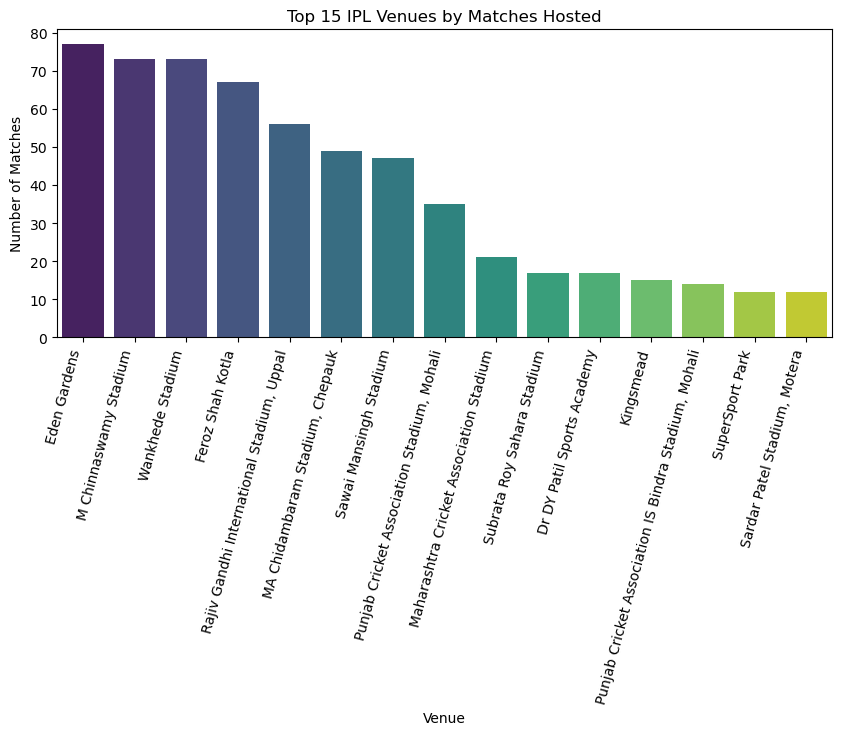

In [30]:
venue_counts = df['venue'].value_counts().reset_index()
venue_counts.columns = ["venue", "matches"]

plt.figure(figsize=(10,4))
sns.barplot(
    data=venue_counts.head(15),
    x="venue", y="matches",
    hue="venue", palette="viridis", legend=False
)
plt.xticks(rotation=75, ha="right")
plt.title("Top 15 IPL Venues by Matches Hosted")
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.show()


INSIGHTS

--> Eden Gardens has hosted the most IPL matches (77).

--> Chinnaswamy Stadium (Bengaluru), Wankhede Stadium (Mumbai), and Feroz Shah Kotla (Delhi) are also top venues, each with 70+ matches.

--> Uppal Stadium (Hyderabad) and Chepauk (Chennai) follow with 50+ matches.

--> Big metro cities dominate as primary venues for IPL matches.

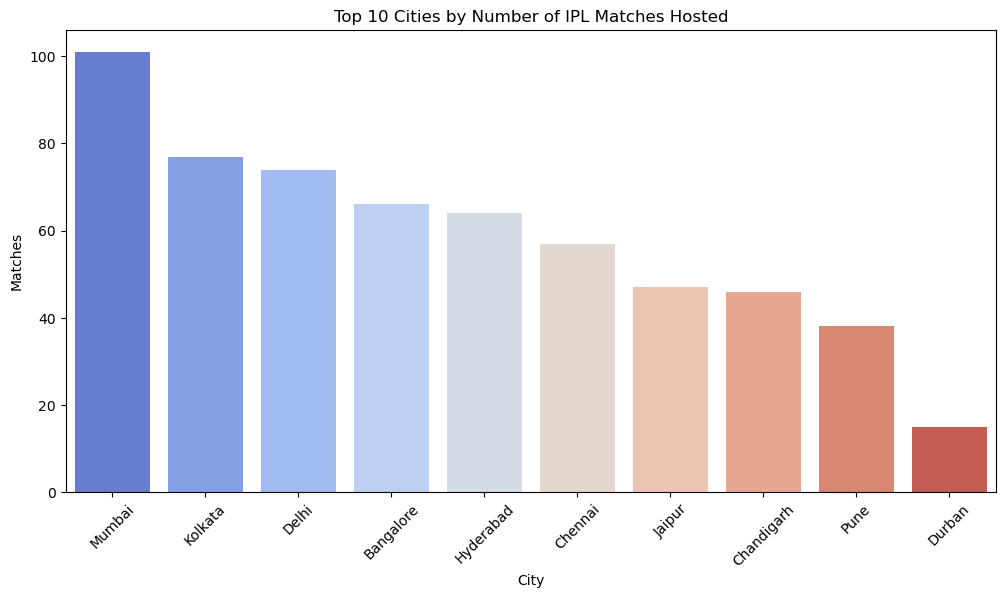

In [31]:
plt.figure(figsize=(12,6))
city_matches = df['city'].value_counts().head(10)

sns.barplot(
    x=city_matches.index,
    y=city_matches.values,
    hue=city_matches.index,   # assign hue explicitly
    palette="coolwarm",
    legend=False              # hide duplicate legend
)

plt.title("Top 10 Cities by Number of IPL Matches Hosted")
plt.xlabel("City")
plt.ylabel("Matches")
plt.xticks(rotation=45)
plt.show()

INSIGHTS

--> Mumbai has hosted the most IPL matches (100+), making it the top city.

--> Kolkata and Delhi follow with 70+ matches each.

--> Bangalore and Hyderabad are close, with 65–70 matches.

--> Chennai has hosted nearly 60 matches.

--> Jaipur and Chandigarh fall in the mid-range with around 45–47 matches.

--> Pune has hosted fewer (about 38).

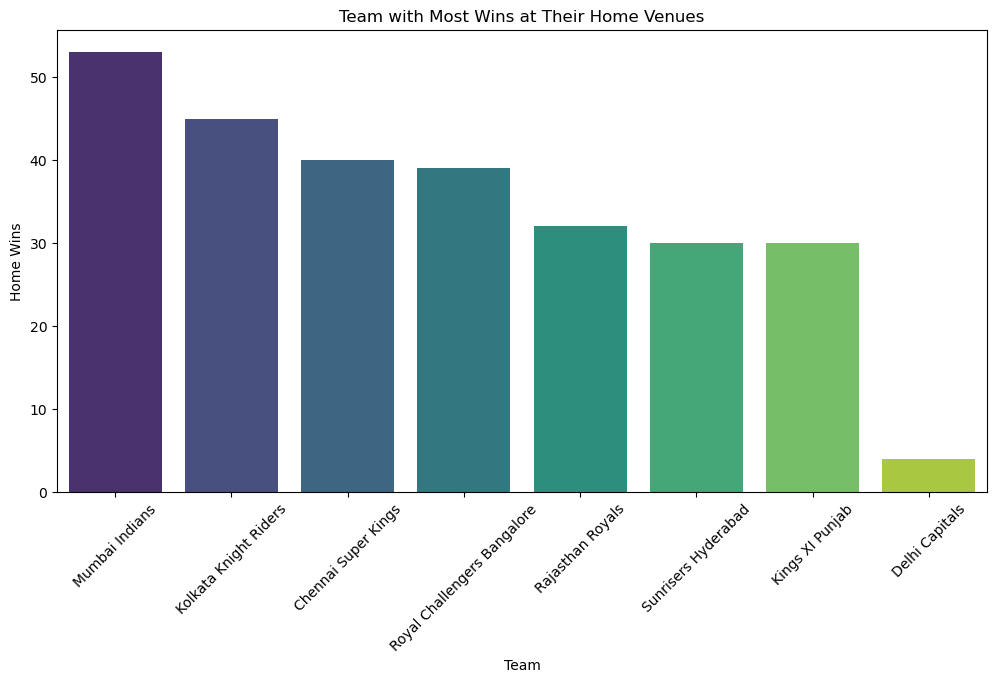

,Team,Home Wins
0,Mumbai Indians,53
3,Kolkata Knight Riders,45
1,Chennai Super Kings,40
2,Royal Challengers Bangalore,39
7,Rajasthan Royals,32
5,Sunrisers Hyderabad,30
6,Kings XI Punjab,30
4,Delhi Capitals,4


In [32]:
home_grounds = {
    "Mumbai Indians": ["Wankhede Stadium","Brabourne Stadium","Dr DY Patil Sports Academy"],
    "Chennai Super Kings": ["MA Chidambaram Stadium, Chepauk","M. A. Chidambaram Stadium"],
    "Royal Challengers Bangalore": ["M Chinnaswamy Stadium","M. Chinnaswamy Stadium"],
    "Kolkata Knight Riders": ["Eden Gardens"],
    "Delhi Capitals": ["Feroz Shah Kotla","Feroz Shah Kotla Ground"],
    "Sunrisers Hyderabad": ["Rajiv Gandhi International Stadium, Uppal","Rajiv Gandhi Intl. Cricket Stadium"],
    "Kings XI Punjab": ["Punjab Cricket Association Stadium, Mohali","Punjab Cricket Association IS Bindra Stadium, Mohali","IS Bindra Stadium"],
    "Rajasthan Royals": ["Sawai Mansingh Stadium"]
}

home_wins = []
for team, venues in home_grounds.items():
    count = df[(df['winner'] == team) & (df['venue'].isin(venues))].shape[0]
    home_wins.append([team, count])

home_wins_df = pd.DataFrame(home_wins, columns=["Team","Home Wins"]).sort_values(by="Home Wins", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Team", y="Home Wins", hue="Team", data=home_wins_df, palette="viridis", legend=False)
plt.title("Team with Most Wins at Their Home Venues")
plt.xticks(rotation=45)
plt.show()

home_wins_df

INSIGHTS

--> Mumbai Indians have the most home wins (50+), showing strong dominance at their venue.

--> Kolkata Knight Riders and Chennai Super Kings also perform very well at home (40–45 wins).

--> Royal Challengers Bangalore and Rajasthan Royals have solid home records with 30–40 wins.

--> Sunrisers Hyderabad and Kings XI Punjab are nearly equal with around 30 wins each.

--> Delhi Capitals lag far behind with very few home wins (less than 5).

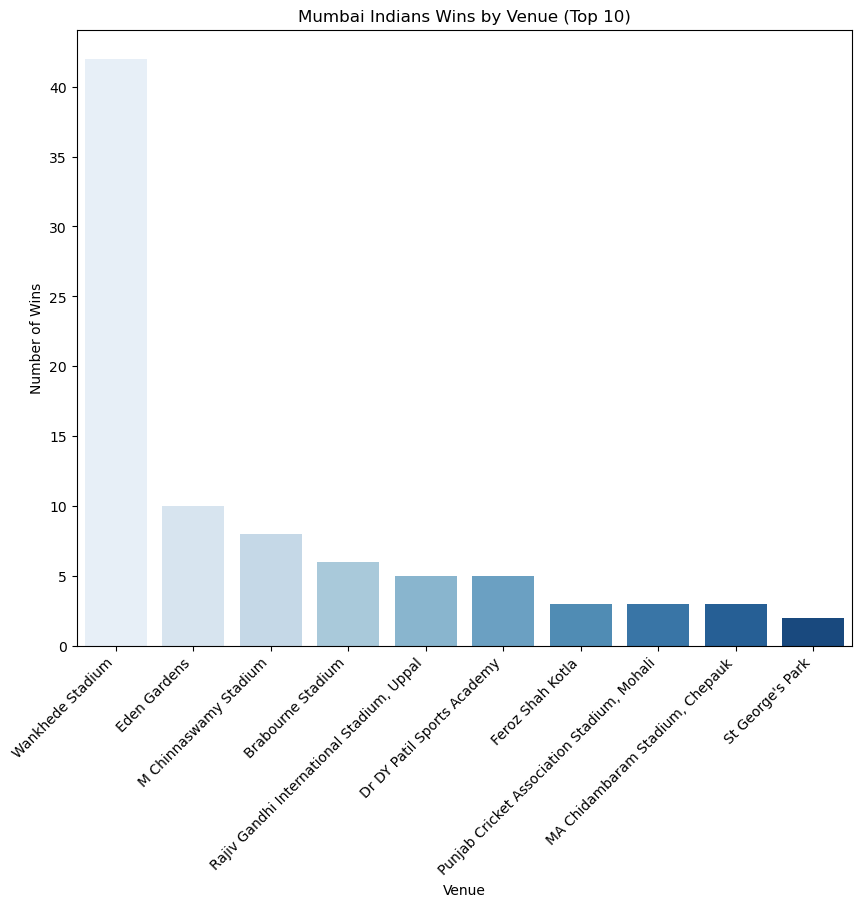

In [34]:
# Filter only Mumbai Indians wins
mi_wins = df[df['winner'] == "Mumbai Indians"]

# Count wins by venue
venue_wins = mi_wins['venue'].value_counts().head(10)  # show top 10 venues

# Plot
plt.figure(figsize=(10,8))
sns.barplot(
    x=venue_wins.index,
    y=venue_wins.values,
    hue=venue_wins.index,
    palette="Blues",
    legend=False
)
plt.title("Mumbai Indians Wins by Venue (Top 10)")
plt.xlabel("Venue")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.show()

INSIGHTS

--> Wankhede Stadium is MI’s strongest fortress with 42 wins, showing a huge home advantage.

--> Eden Gardens is their second-best venue with 10 wins.

--> M. Chinnaswamy Stadium comes next with 8 wins.

--> Other venues like Brabourne Stadium, Uppal, DY Patil, and Feroz Shah Kotla have given MI 5–6 wins each.

--> Venues like Mohali, Chepauk, and St George’s Park contributed only 2–3 wins each.

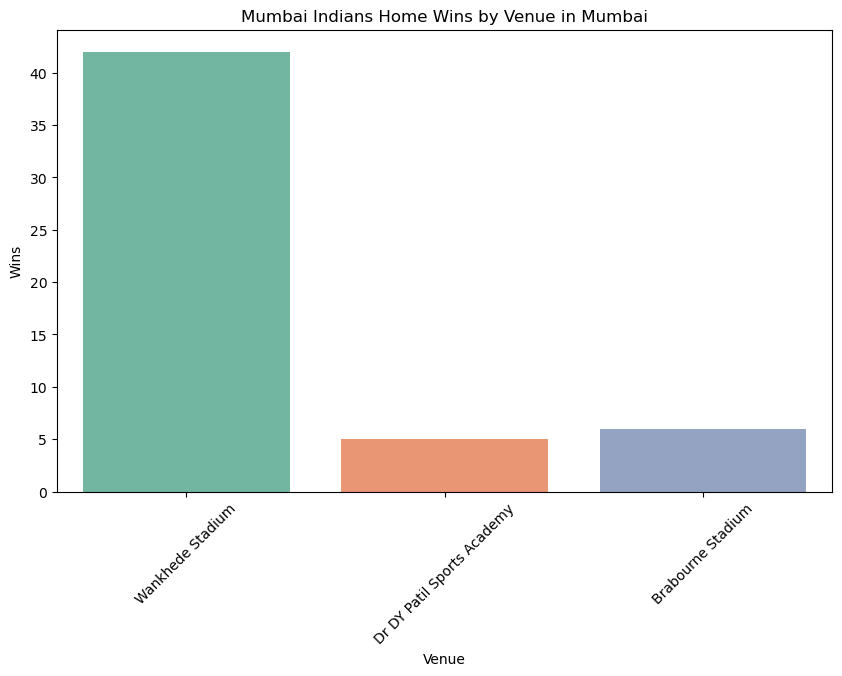

In [35]:
mi_home = df[(df['winner'] == "Mumbai Indians") & (df['city'].str.lower() == "mumbai")]

plt.figure(figsize=(10,6))
sns.countplot(x="venue", data=mi_home, palette="Set2")
plt.title("Mumbai Indians Home Wins by Venue in Mumbai")
plt.xlabel("Venue")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

INSIGHTS

--> Wankhede Stadium is MI’s strongest fortress with 42 wins, showing a huge home advantage.

--> Eden Gardens is their second-best venue with 10 wins.

--> M. Chinnaswamy Stadium comes next with 8 wins.

--> Other venues like Brabourne Stadium, Uppal, DY Patil, and Feroz Shah Kotla have given MI 5–6 wins each.

--> Venues like Mohali, Chepauk, and St George’s Park contributed only 2–3 wins each.

<h2>BIVARIENT ANALYSIS</h2>

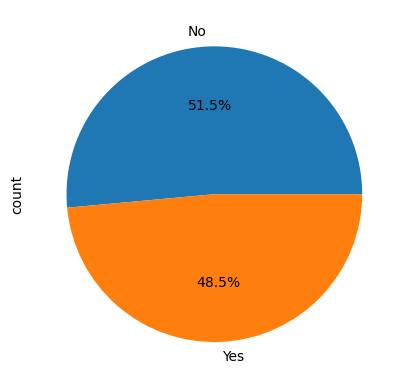

In [36]:
df['toss_match_win'] = df['toss_winner'] == df['winner']

df['toss_match_win'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['No', 'Yes']
)
plt.show()



INSIGHTS

--> Winning the toss does not guarantee a win.

--> Teams that won the toss also won the match only 47.9% of the time.

--> In fact, 52.1% of matches were won by teams that lost the toss

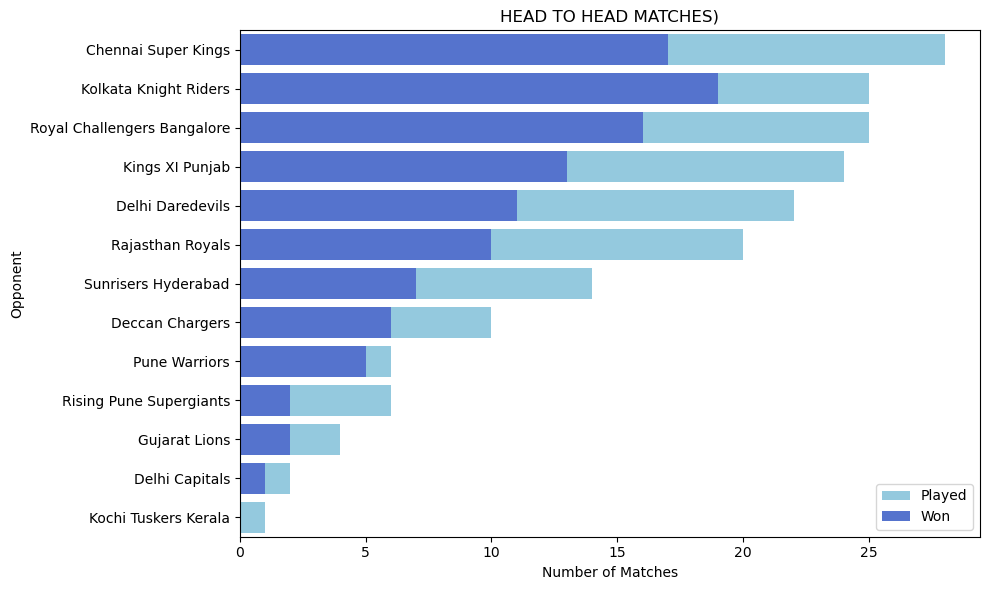

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Your existing summary (kept as is) ---
mumbai = df[(df["team1"] == "Mumbai Indians") | (df["team2"] == "Mumbai Indians")]
mumbai["opponent"] = mumbai.apply(lambda x: x["team2"] if x["team1"]=="Mumbai Indians" else x["team1"], axis=1)

played = mumbai["opponent"].value_counts()
won = mumbai[mumbai["winner"]=="Mumbai Indians"]["opponent"].value_counts()

summary = pd.DataFrame({"Played": played, "Won": won}).fillna(0).astype(int)
summary = summary.sort_values(by="Played", ascending=False)  # High → Low order

# --- Plot with gradient effect ---
plt.figure(figsize=(10,6))

# Plot "Played"
sns.barplot(
    x=summary["Played"],
    y=summary.index,
    color="skyblue",
    label="Played"
)

# Overlay "Won" (darker shade for gradient effect)
sns.barplot(
    x=summary["Won"],
    y=summary.index,
    color="royalblue",
    label="Won"
)

plt.title("HEAD TO HEAD MATCHES)")
plt.xlabel("Number of Matches")
plt.ylabel("Opponent")
plt.legend()
plt.tight_layout()
plt.show()

INSIGHTS

--> Mumbai dominates KKR and has a clear edge over CSK, showing strong performances in big rivalries.

--> Against Punjab, Rajasthan, and Delhi, results are quite balanced, showing unpredictable outcomes.

--> Mumbai has historically done very well against short-lived teams like Pune Warriors.

--> Rivalries with CSK and KKR stand out as the most exciting and competitive.

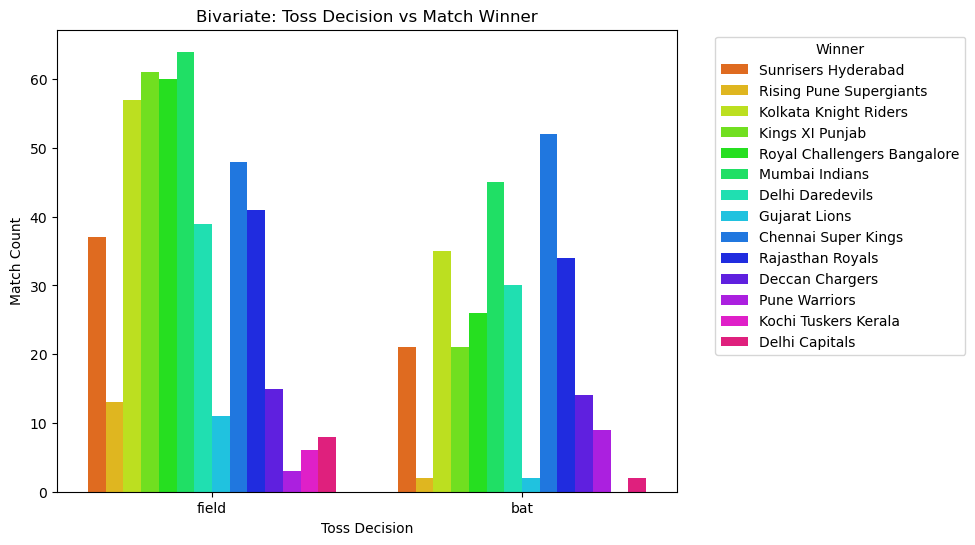

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x="toss_decision", hue="winner", data=df, palette="hsv")
plt.title("Bivariate: Toss Decision vs Match Winner")
plt.xlabel("Toss Decision")
plt.ylabel("Match Count")
plt.legend(title="Winner", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

INSIGHTS

--> Teams winning the toss and choosing to field usually win more matches than those who choose to bat.

--> This shows that chasing gives a slight advantage in the IPL.

--> Advantage of chasing may come from pitch conditions and knowing the target.

--> Strong teams like CSK and MI win matches in both situations (bat or field), showing team strength matters more.

--> Main takeaway: Toss has an impact, but team performance and strategy are more important.

<h2>MULTIVARIENT ANALYSIS</h2>

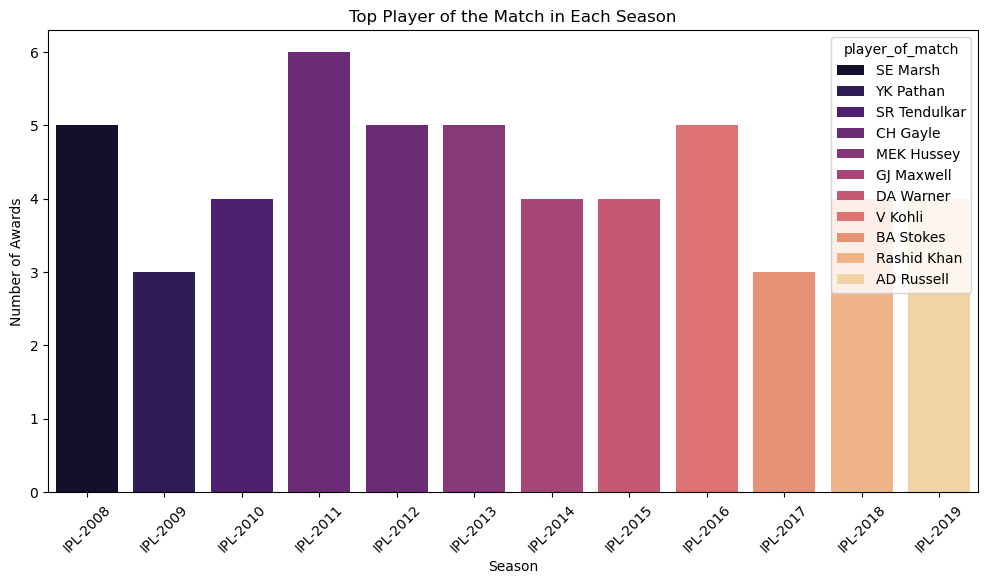

In [39]:
top_players_season = df.groupby(["season","player_of_match"]).size().reset_index(name="awards")
top_players_season = top_players_season.sort_values(["season","awards"], ascending=[True,False]).groupby("season").head(1)

plt.figure(figsize=(12,6))
sns.barplot(x="season", y="awards", hue="player_of_match", data=top_players_season, dodge=False, palette="magma")
plt.title("Top Player of the Match in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Awards")
plt.xticks(rotation=45)
plt.show()


INSIGHTS

2008: SE Marsh stood out with the most match-winning performances.

2009: YK Pathan was the star performer.

2010: SR Tendulkar dominated as the top player.

2011: CH Gayle took the spotlight with the highest awards.

2012 & 2013: MEK Hussey and CH Gayle continued strong performances.

2014: GJ Maxwell was the standout performer.

2015 & 2016: DA Warner and V Kohli led their teams with consistent match-winning efforts.

2017: BA Stokes impressed in his debut season.

2018: Rashid Khan shone as a match-winner with his bowling heroics.

2019: AD Russell dominated with all-round performances.

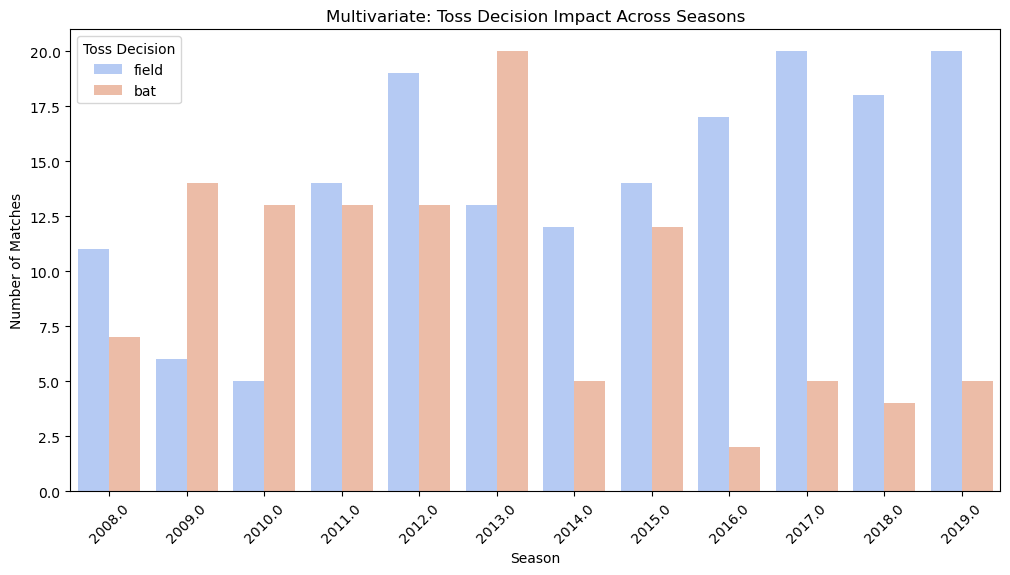

In [40]:
# Make sure date column is datetime & extract season (year)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['season'] = df['date'].dt.year

# Simple grouped barplot instead of pivot_table
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="toss_decision", data=df, palette="coolwarm")

plt.title("Multivariate: Toss Decision Impact Across Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.legend(title="Toss Decision")
plt.show()

INSIGHTS

--> Early years (2008–2010): Teams often preferred to bat first after winning the toss.

--> 2011–2013: A balance between batting and fielding decisions.

--> From 2014 onwards: Strong shift towards fielding first, showing a growing trend of teams favoring chasing.

--> 2016–2019: Clear dominance of the “field first” strategy, with very few teams choosing to bat first.

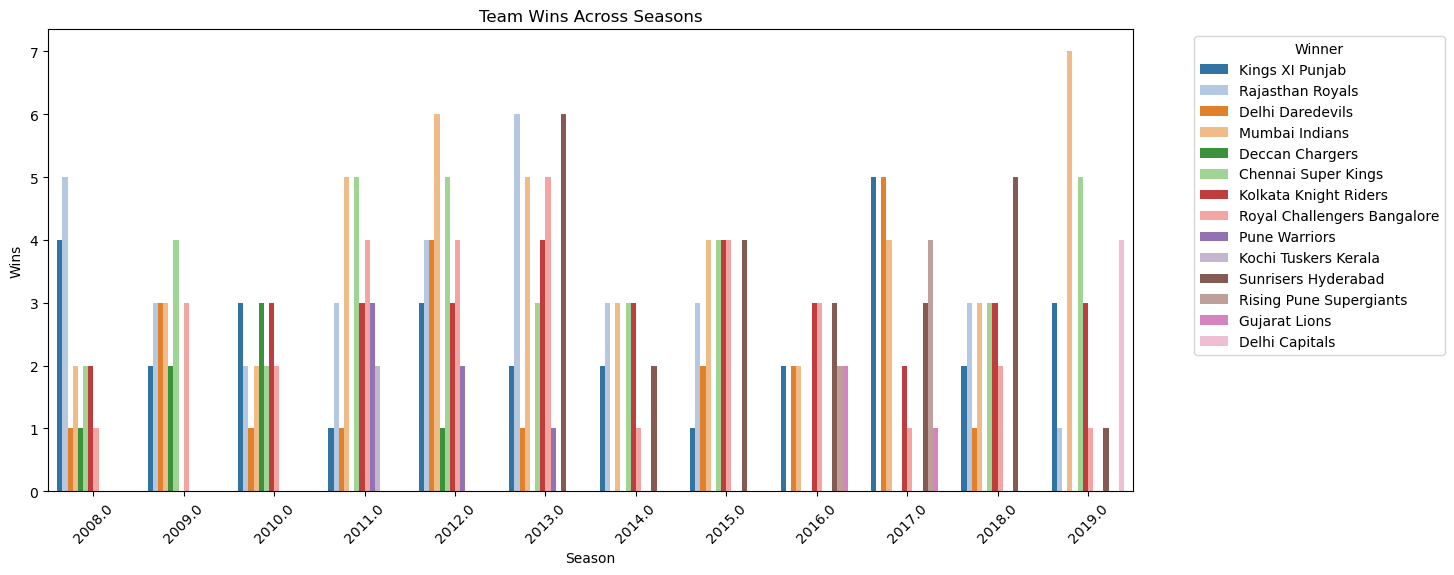

In [41]:
plt.figure(figsize=(14,6))
sns.countplot(x="season", hue="winner", data=df, palette="tab20")
plt.title("Team Wins Across Seasons")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.legend(title="Winner", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

INSIGHTS

--> Chennai Super Kings (CSK) & Mumbai Indians (MI): Most consistent winners across seasons.

--> Rajasthan Royals & Deccan Chargers: Strong in early years but later declined.

--> Kolkata Knight Riders (KKR) & Royal Challengers Bangalore (RCB): Performance went up and down.

--> Sunrisers Hyderabad (SRH): Performed well after joining IPL.

--> Delhi Daredevils/Capitals, Kings XI Punjab, Pune Warriors: Less consistent, struggled to win regularly.

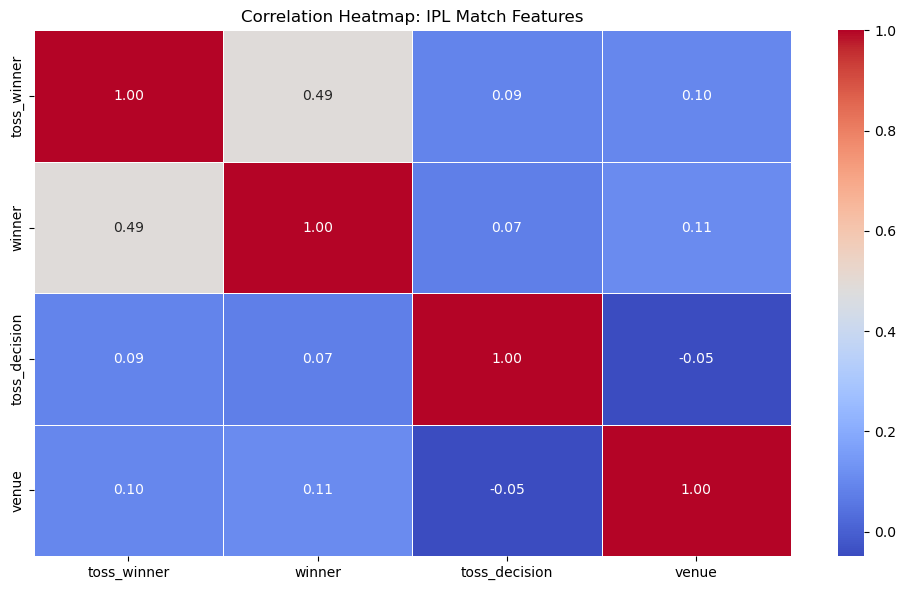

In [42]:
# Select relevant columns
cols = ['toss_winner', 'winner', 'toss_decision', 'venue']
ipl_data = df[cols].copy()

# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in ['toss_winner', 'winner', 'toss_decision', 'venue']:
    ipl_data[col] = encoder.fit_transform(ipl_data[col].astype(str))

# Compute correlation matrix
corr_matrix = ipl_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: IPL Match Features')
plt.tight_layout()
plt.show()

INSIGHTS

--> Winning the toss has some link to winning the match (about 49% correlation).

--> Toss decision (bat/field) does not affect much.

--> Venue also has very little impact.

--> Team performance matters more than toss or venue.

In [43]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue,toss_match_win
0,1,2017.0,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",False
1,2,2017.0,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,False
2,3,2017.0,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,True
3,4,2017.0,Indore,2017-08-04,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,True
4,5,2017.0,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019.0,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,True
752,11412,2019.0,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,False
753,11413,2019.0,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,True
754,11414,2019.0,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,True


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(["id","season","city","date","winner","win_by_runs","win_by_wickets","player_of_match"], axis=1)
y = df["winner"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

     team1  team2  toss_winner  toss_decision  venue  toss_match_win
0       13     12           13              1     28           False
1        8     11           11              1     21           False
2        4      7            7              1     31            True
3       11      5            5              1     13            True
4       12      3           13              0     17            True
..     ...    ...          ...            ...    ...             ...
751      7      8            8              1     40            True
752      0      8            0              0     18           False
753     13      2            2              1      0            True
754      2      0            0              1      0            True
755      8      0            8              0     29            True

[756 rows x 6 columns]
0      13
1      11
2       7
3       5
4      12
       ..
751     8
752     8
753     2
754     0
755     8
Name: winner, Length: 756, dtype: int3

<h2>LOGISTIC REGRESSION </h2>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [48]:

# ✅ Training & Testing Accuracy
train_accuracy_LR = accuracy_score(y_train, y_pred_train)
test_accuracy_LR = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy_LR)
print("Testing Accuracy:", test_accuracy_LR)

Training Accuracy: 0.27483443708609273
Testing Accuracy: 0.25


<h2>SUPPORT VECTOR CLASSIFIER</h2>

In [49]:
from sklearn.svm import SVC

In [50]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [51]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [52]:
# ✅ Training & Testing Accuracy
train_accuracy_SVC = accuracy_score(y_train, y_pred_train)
test_accuracy_SVC = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy_SVC)
print("Testing Accuracy:", test_accuracy_SVC)

Training Accuracy: 0.4304635761589404
Testing Accuracy: 0.42105263157894735


<h2>RANDOM FOREST CLASSIFIER</h2>

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_train = model.predict(X_train)   # Training set
y_pred_test = model.predict(X_test)     # Testing set

In [56]:
# ✅ Training and Testing Accuracy
train_accuracy_RF = accuracy_score(y_train, y_pred_train)
test_accuracy_RF = accuracy_score(y_test, y_pred_test)

In [57]:
print("Training Accuracy:", train_accuracy_RF)
print("Testing Accuracy:", test_accuracy_RF)


Training Accuracy: 1.0
Testing Accuracy: 0.8289473684210527


<h2>DECISION TREE CLASSIFIER</h2>

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred_dt = dt_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_train)

In [61]:
# ✅ Training and Testing Accuracy
train_accuracy_DTC = accuracy_score(y_train, y_pred_train)
test_accuracy_DTC = accuracy_score(y_test, y_pred_test)

In [62]:
print("Training Accuracy:", train_accuracy_DTC)
print("Testing Accuracy:", test_accuracy_DTC)

Training Accuracy: 1.0
Testing Accuracy: 0.8289473684210527


<h2>K-NEAREST NEIGHBOUR</h2>

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score, KFold

In [64]:
k_range = range(1, 21) 
cv = KFold(n_splits=10, shuffle=True, random_state=42) 
mean_mse = [] 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  
    mse = cross_val_score(knn, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mean_mse.append(-mse.mean())

In [65]:
best_k = k_range[np.argmin(mean_mse)]
print(f'Best K: {best_k}')

Best K: 1


In [66]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [67]:
# ✅ Predictions
y_pred_train = knn.predict(X_train)   # Training predictions
y_pred_test = knn.predict(X_test)     # Testing predictions

In [68]:
# ✅ Training & Testing Accuracy
train_accuracy_KNN = accuracy_score(y_train, y_pred_train)
test_accuracy_KNN = accuracy_score(y_test, y_pred_test)

In [69]:
print("Training Accuracy:", train_accuracy_KNN)
print("Testing Accuracy:", test_accuracy_KNN)

Training Accuracy: 1.0
Testing Accuracy: 0.5592105263157895


<h2>XG BOOST CLASSIFIER</h2>

In [70]:
import plotly.offline as py
import xgboost as xgb

In [71]:
xgb_cfl = xgb.XGBClassifier(
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [72]:
# ✅ Train the model
xgb_cfl.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [73]:
# ✅ Predictions
y_pred_train = xgb_cfl.predict(X_train)
y_pred_test = xgb_cfl.predict(X_test)

In [74]:

# ✅ Training & Testing Accuracy
train_accuracy_XG = accuracy_score(y_train, y_pred_train)
test_accuracy_XG = accuracy_score(y_test, y_pred_test)

In [75]:
print("Training Accuracy:", train_accuracy_XG)
print("Testing Accuracy:", test_accuracy_XG)

Training Accuracy: 1.0
Testing Accuracy: 0.9342105263157895


In [76]:
# Example variable names (as previously calculated)
train_accuracy_LR, test_accuracy_LR
train_accuracy_KNN, test_accuracy_KNN
train_accuracy_SVC, test_accuracy_SVC
train_accuracy_RF, test_accuracy_RF
train_accuracy_DTC, test_accuracy_DTC
train_accuracy_XG, test_accuracy_XG


(1.0, 0.9342105263157895)

In [77]:
training_results = {
    "LR": train_accuracy_LR,
    "KNN": train_accuracy_KNN,
    "SVC": train_accuracy_SVC,
    "Random Forest": train_accuracy_RF,
    "DTC": train_accuracy_DTC,
    "XGBoost": train_accuracy_XG
}

testing_results = {
    "LR": test_accuracy_LR,
    "KNN": test_accuracy_KNN,
    "SVC": test_accuracy_SVC,
    "Random Forest": test_accuracy_RF,
    "DTC": test_accuracy_DTC,
    "XGBoost": test_accuracy_XG
}


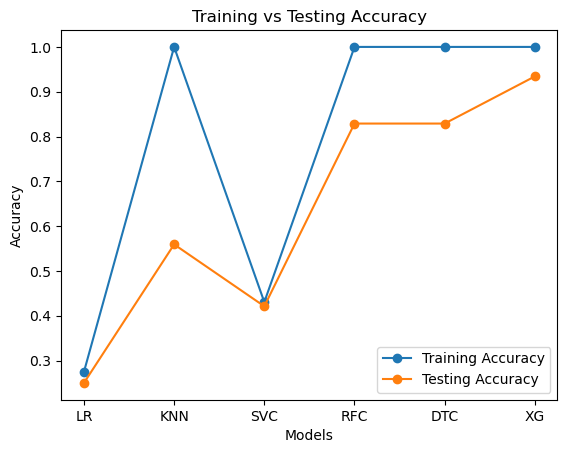

In [78]:
train_acc = [train_accuracy_LR, train_accuracy_KNN, train_accuracy_SVC, train_accuracy_RF, train_accuracy_DTC, train_accuracy_XG]
test_acc = [test_accuracy_LR, test_accuracy_KNN, test_accuracy_SVC, test_accuracy_RF, test_accuracy_DTC, test_accuracy_XG]

models = ["LR", "KNN", "SVC", "RFC", "DTC", "XG"]

plt.plot(models, train_acc, marker='o', label="Training Accuracy")
plt.plot(models, test_acc, marker='o', label="Testing Accuracy")

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.show()

<h2>HYPER PARAMETER TUNING USING GRID SEARCH CV</h2>

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],           # <-- comma added
    'n_estimators': [200, 300, 500],  # <-- comma added
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid Search
grid = GridSearchCV(estimator=xgb_cfl, param_grid=param_grid, 
                    cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


In [82]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [200, 300, 500],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [83]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:",grid.best_score_)                        

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
Best CV Accuracy: 0.9122176308539945


In [84]:
# Predictions on training and test set
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

In [85]:
# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Testing accuracy
test_acc = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


<h2>USING RANDOMIZED SEARCH CV</h2>

In [86]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [87]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [88]:
# Stratified K-Fold for classification
folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

In [89]:
# Randomized Search
param_comb = 50  # number of parameter combinations to try
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=params,
    n_iter=param_comb,
    scoring='accuracy',
    n_jobs=-1,
    cv=skf,
    verbose=2,
    random_state=42
)

In [90]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [91]:
print('\nBest Estimator:')
print(random_search.best_estimator_)

print('\nBest CV Accuracy (mean over folds):', random_search.best_score_)

print('\nBest Hyperparameters:')
print(random_search.best_params_)



Best Estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

Best CV Accuracy (mean over folds): 0.9055922865013774

Best Hyperparameters:
{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 

In [92]:
# Predictions
y_train_pred = random_search.predict(X_train)
y_test_pred = random_search.predict(X_test)

In [93]:
# Training and Testing Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [94]:

print("\nTraining Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.9407894736842105


In [95]:
import joblib
joblib.dump(grid, "IPL_prediction_model.pkl")

['IPL_prediction_model.pkl']

In [96]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue,toss_match_win
0,1,2017.0,15,2017-05-04,13,12,13,1,13,35,0,224,28,False
1,2,2017.0,27,2017-06-04,8,11,11,1,11,0,7,199,21,False
2,3,2017.0,29,2017-07-04,4,7,7,1,7,0,10,34,31,True
3,4,2017.0,16,2017-08-04,11,5,5,1,5,0,6,61,13,True
4,5,2017.0,2,2017-08-04,12,3,13,0,12,15,0,99,17,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019.0,24,2019-05-05,7,8,8,1,8,0,9,64,40,True
752,11412,2019.0,8,2019-07-05,0,8,0,0,8,0,6,22,18,False
753,11413,2019.0,32,2019-08-05,13,2,2,1,2,0,2,170,0,True
754,11414,2019.0,32,2019-10-05,2,0,0,1,0,0,6,55,0,True


In [97]:
df.to_excel("output.xlsx", index=False)

print("Excel file saved successfully!")

Excel file saved successfully!


In [98]:
print(y)

0      13
1      11
2       7
3       5
4      12
       ..
751     8
752     8
753     2
754     0
755     8
Name: winner, Length: 756, dtype: int32


In [100]:
import pandas as pd
import joblib

# Load trained model
model = joblib.load("IPL_prediction_model.pkl")

# Example: User input (must match training features)
team1 = int(input("Enter team1 (encoded): "))
team2 = int(input("Enter team2 (encoded): "))
toss_winner = int(input("Enter toss winner (encoded): "))
toss_decision = int(input("Enter toss decision (encoded): "))
venue = int(input("Enter venue (encoded): "))

# Calculate toss_match_win (depends on how you created it in training)
toss_match_win = 1 if toss_winner in [team1, team2] else 0

# Build DataFrame with same features as training
user_data = pd.DataFrame([[
  team1, team2, toss_winner, toss_decision, venue, toss_match_win
]], columns=[
     'team1', 'team2', 'toss_winner',
    'toss_decision', 'venue', 'toss_match_win'
])

# Predict
prediction = model.predict(user_data)

print("🏏 Predicted Match Winner (encoded):", prediction[0])


Enter team1 (encoded):  8
Enter team2 (encoded):  11
Enter toss winner (encoded):  11
Enter toss decision (encoded):  1
Enter venue (encoded):  21


🏏 Predicted Match Winner (encoded): 11


In [101]:
# Suppose prediction is a numpy array like [7] (label encoded winner)
  # Example

# Dictionary mapping (label → team name)
team_labels = {
    0: "Chennai Super Kings",
    1: "Delhi Daredevils",
    2: "Delhi Capitals",
    3: "Gujarat Lions",
    4: "Kings XI Punjab",
    5: "Kolkata Knight Riders",
    6: "Kochi Tuskers Kerala",
    7: "Mumbai Indians",
    8: "Pune Warriors",
    9: "Rajasthan Royals",
    10: "Rising Pune Supergiant",
    11: "Rising Pune Supergiants",
    12: "Deccan Chargers",
    13: "Royal Challengers Bangalore",
    14: "Sunrisers Hyderabad"
}

# Convert prediction label → team name
predicted_team = team_labels.get(prediction[0], "Unknown")

print("Predicted Winner:", predicted_team)

Predicted Winner: Rising Pune Supergiants


<h1>Overall Insights from the IPL Match Prediction Analysis</h1>

Toss Impact: Winning the toss provides a small advantage (~49% correlation with winning the match), but it is not a deciding factor. The toss decision (bat/field) varies across seasons and teams, with chasing generally being slightly favorable.

Toss Impact: Winning the toss provides a small advantage (~49% correlation with winning the match), but it is not a deciding factor. The toss decision (bat/field) varies across seasons and teams, with chasing generally being slightly favorable.

Venue Effect: While some teams like Mumbai Indians and Chennai Super Kings perform strongly at their home grounds, overall, venue has minimal direct correlation with match results.

Team Strength: Team performance and strategies matter much more than toss or venue. Dominant teams consistently win matches regardless of conditions.

Player Influence: Certain players (like Chris Gayle, David Warner, Virat Kohli, Andre Russell) have had a significant impact in their respective seasons, often shifting match outcomes.

Trends Across Seasons: Over the years, IPL outcomes highlight that balanced squads with strong individual performers tend to dominate, rather than just luck factors like toss or venue.